In [2]:
import pandas as pd
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import numpy as np
from linearmodels.panel import PanelOLS
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation Matrix All Data

In [3]:
df = pd.read_csv("Dataframes/economic_story.csv")
#df = df.loc[:, ["Instrument", "Date", "Earnings Per Share - Actual Surprise", "Revenue - Actual", "Net Income after Tax"]]
df["Date"] = pd.to_datetime(df["Date"]).dt.tz_localize(None)
df = df.dropna(subset="Earnings Per Share - Actual Surprise")
df

,Instrument,Date,Earnings Per Share - Actual,Earnings Per Share - Mean,Earnings Per Share - Actual Surprise,GICS Industry Group Name,Earnings Per Share – Coefficient of Variation,Market Capitalization,Revenue - Actual,Enterprise Value,...,Recommendation - Mean (1-5),Recommendation - Mean (1-5).1,Net Income after Tax,Price Target - Mean,Price Target - Standard Deviation,Price Close,Enterprise Value To Sales (Daily Time Series Ratio),3 Month Total Return,Volume,Earnings Per Share - Actual Surprise AbsVals
0,AVY.N,2013-01-01,0.54,0.48571,11.178,Materials,3.625620,3.426001e+09,1.532200e+09,4.413001e+09,...,3.00000,3.000,33400000.0,36.00000,2.44949,34.92,0.799347,10.637479,207295.0,11.178
1,AVY.N,2013-04-01,0.59,0.57571,2.482,Materials,2.046169,4.309428e+09,1.498900e+09,5.459128e+09,...,2.87500,3.000,66800000.0,42.57143,3.92272,43.07,0.895787,24.148726,0.0,2.482
2,AVY.N,2013-07-01,0.71,0.70250,1.068,Materials,1.551601,4.258229e+09,1.552300e+09,5.436229e+09,...,2.87500,2.875,70800000.0,45.00000,4.30946,42.76,0.906078,-0.054218,0.0,1.068
3,AVY.N,2013-10-01,0.69,0.63833,8.095,Materials,2.775994,4.273414e+09,1.504900e+09,5.029514e+09,...,2.62500,2.875,62000000.0,47.71429,3.45230,43.52,0.903176,2.467620,236291.0,8.095
4,AVY.N,2014-01-01,0.69,0.68000,1.471,Materials,3.204412,4.877168e+09,1.583900e+09,5.553068e+09,...,2.33333,2.625,42100000.0,54.62500,3.42555,50.19,0.920659,16.003852,157761.0,1.471
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20115,POOL.OQ,2021-10-01,4.51,3.84833,17.194,Retailing,2.836295,1.742020e+10,1.411448e+09,1.769954e+10,...,2.30000,2.300,184573000.0,545.28571,50.48823,434.41,3.684400,-5.130322,157740.0,17.194
20116,POOL.OQ,2022-01-01,2.63,1.87500,40.267,Retailing,3.269867,2.268979e+10,1.035557e+09,2.384882e+10,...,2.30000,2.300,107542000.0,571.00000,41.33833,566.00,4.504382,30.489705,82349.0,40.267
20117,POOL.OQ,2022-04-01,4.23,3.14867,34.342,Retailing,6.630736,1.696712e+10,1.412650e+09,1.843682e+10,...,2.00000,2.300,179203000.0,519.88889,37.49206,422.85,3.422880,-25.160664,290897.0,34.342
20118,POOL.OQ,2022-07-01,7.63,7.51700,1.503,Retailing,3.625249,1.405795e+10,2.055818e+09,1.556187e+10,...,2.20000,2.000,307205000.0,435.37500,57.57373,351.23,2.749481,-21.661570,185584.0,1.503


In [9]:
# Calculate the 0.15th and 99.85th percentile
pct_0_15 = np.percentile(df['Earnings Per Share - Actual Surprise'], 0.5)
pct_99_85 = np.percentile(df['Earnings Per Share - Actual Surprise'], 99.5)

# Remove the data points outside the 0.15th and 99.85th percentile
df = df[(df['Earnings Per Share - Actual Surprise'] >= pct_0_15) & (df['Earnings Per Share - Actual Surprise'] <= pct_99_85)].copy()
df

,Instrument,Date,Earnings Per Share - Actual,Earnings Per Share - Mean,Earnings Per Share - Actual Surprise,GICS Industry Group Name,Earnings Per Share – Coefficient of Variation,Market Capitalization,Revenue - Actual,Enterprise Value,...,Recommendation - Mean (1-5),Recommendation - Mean (1-5).1,Net Income after Tax,Price Target - Mean,Price Target - Standard Deviation,Price Close,Enterprise Value To Sales (Daily Time Series Ratio),3 Month Total Return,Volume,Earnings Per Share - Actual Surprise AbsVals
0,AVY.N,2013-01-01,0.54,0.48571,11.178,Materials,3.625620,3.426001e+09,1.532200e+09,4.413001e+09,...,3.00000,3.000,33400000.0,36.00000,2.44949,34.92,0.799347,10.637479,207295.0,11.178
1,AVY.N,2013-04-01,0.59,0.57571,2.482,Materials,2.046169,4.309428e+09,1.498900e+09,5.459128e+09,...,2.87500,3.000,66800000.0,42.57143,3.92272,43.07,0.895787,24.148726,0.0,2.482
2,AVY.N,2013-07-01,0.71,0.70250,1.068,Materials,1.551601,4.258229e+09,1.552300e+09,5.436229e+09,...,2.87500,2.875,70800000.0,45.00000,4.30946,42.76,0.906078,-0.054218,0.0,1.068
3,AVY.N,2013-10-01,0.69,0.63833,8.095,Materials,2.775994,4.273414e+09,1.504900e+09,5.029514e+09,...,2.62500,2.875,62000000.0,47.71429,3.45230,43.52,0.903176,2.467620,236291.0,8.095
4,AVY.N,2014-01-01,0.69,0.68000,1.471,Materials,3.204412,4.877168e+09,1.583900e+09,5.553068e+09,...,2.33333,2.625,42100000.0,54.62500,3.42555,50.19,0.920659,16.003852,157761.0,1.471
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20115,POOL.OQ,2021-10-01,4.51,3.84833,17.194,Retailing,2.836295,1.742020e+10,1.411448e+09,1.769954e+10,...,2.30000,2.300,184573000.0,545.28571,50.48823,434.41,3.684400,-5.130322,157740.0,17.194
20116,POOL.OQ,2022-01-01,2.63,1.87500,40.267,Retailing,3.269867,2.268979e+10,1.035557e+09,2.384882e+10,...,2.30000,2.300,107542000.0,571.00000,41.33833,566.00,4.504382,30.489705,82349.0,40.267
20117,POOL.OQ,2022-04-01,4.23,3.14867,34.342,Retailing,6.630736,1.696712e+10,1.412650e+09,1.843682e+10,...,2.00000,2.300,179203000.0,519.88889,37.49206,422.85,3.422880,-25.160664,290897.0,34.342
20118,POOL.OQ,2022-07-01,7.63,7.51700,1.503,Retailing,3.625249,1.405795e+10,2.055818e+09,1.556187e+10,...,2.20000,2.000,307205000.0,435.37500,57.57373,351.23,2.749481,-21.661570,185584.0,1.503


Remove outliers

C:\Users\alexa\AppData\Local\Temp\ipykernel_21272\406892899.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


<AxesSubplot: >

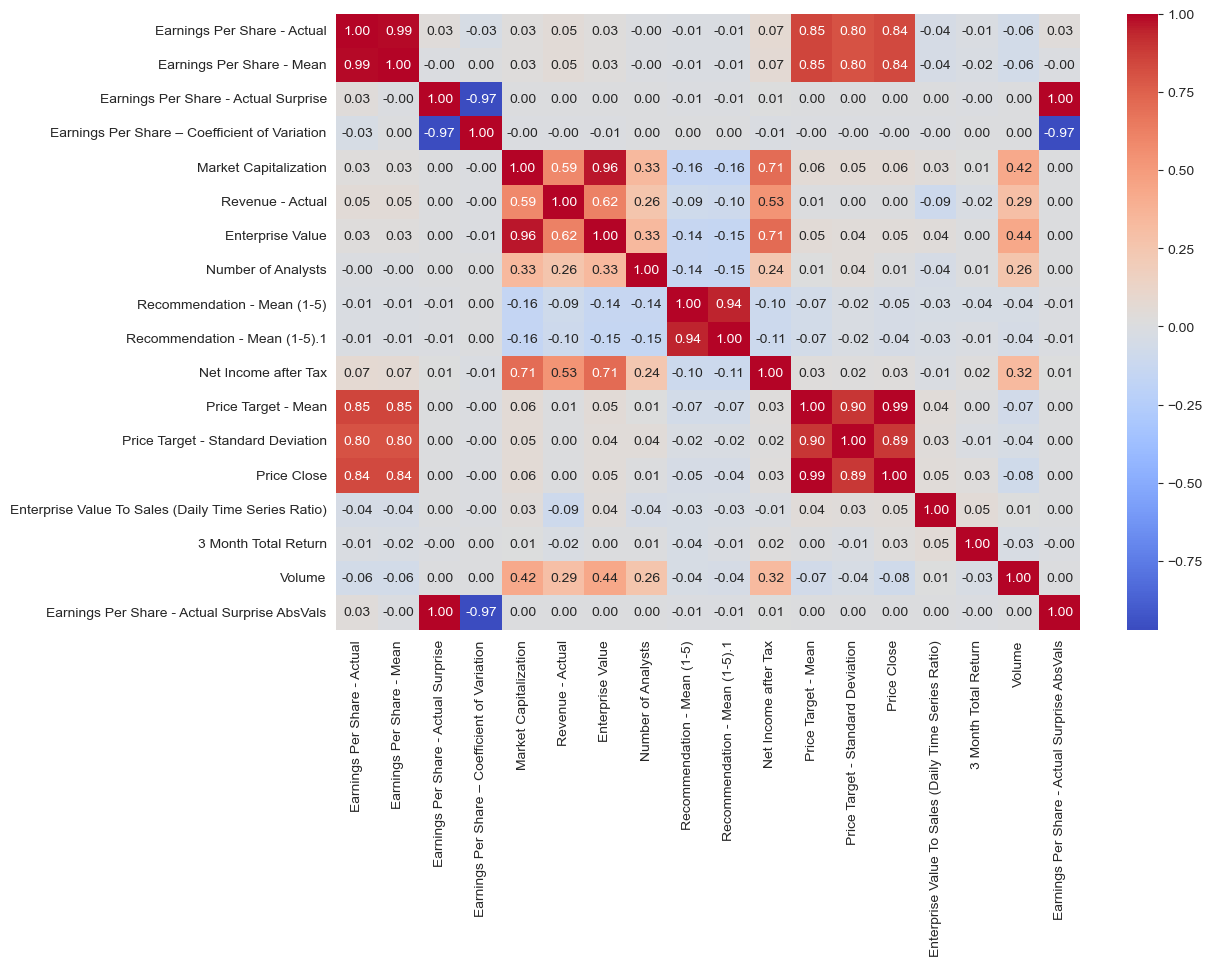

In [10]:
corr_matrix = df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt='.2f')

In [ ]:
#for_rf = df_accuracy_new.iloc[:25,:]
for_rf = df[df['Instrument'] == 'AAPL.OQ']
#.iloc[0:38, :]

# print the reversed DataFrame
for_rf

In [ ]:
corr_matrix = for_rf.groupby('Instrument').corr()

In [ ]:
# plot a heatmap of the correlation matrix
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt='.2f')

In [ ]:
#decide which df to use
df = pd.read_csv("Dataframes/analysts.csv")
#df = df.loc[:, ["Instrument", "Date", "Earnings Per Share - Actual Surprise", "Revenue - Actual", "Net Income after Tax"]]

df

In [ ]:
#identifying outliers and replacing them with NA
summary_stats = df["Earnings Per Share - Actual Surprise"].describe()
Q1 = summary_stats.loc['25%']
Q3 = summary_stats.loc['75%']
IQR = Q3 - Q1
threshold = 7 #1.5 is standard threshold but we still want to keep enough variation in the data so setting threshol higher here
surprise_outliers_removed = df["Earnings Per Share - Actual Surprise"].loc[~((df["Earnings Per Share - Actual Surprise"] < (Q1 - threshold * IQR)) | (df["Earnings Per Share - Actual Surprise"] > (Q3 + threshold * IQR)))]
df_accuracy_new = df.copy()
df_accuracy_new["Earnings Per Share - Actual Surprise"] = surprise_outliers_removed
df_accuracy_new = df_accuracy_new.dropna(subset=["Earnings Per Share - Actual Surprise"])
#df_accuracy_new["Recommendation - Mean (1-5)"] = df_accuracy_new["Recommendation - Mean (1-5)"].fillna(0)
#df_accuracy_new = df_accuracy_new.dropna()


In [ ]:
#for_rf = df_accuracy_new.iloc[:25,:]
for_rf = df_accuracy_new[df_accuracy_new['Instrument'] == 'AAPL.OQ']
#.iloc[0:38, :]


# print the reversed DataFrame
for_rf

In [ ]:
corr_matrix = for_rf.groupby('Instrument').corr()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# plot a heatmap of the correlation matrix
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt='.2f')